<font size=7> Spectrogram Plots

<font color="red">

**NOTE:** To run this notebook you need to create a codespace with 64gb of RAM

Create the spectrogram

# Set up

In [1]:
import pickle
from matplotlib import pyplot as plt
from human_hip.raw_data import get_brain_waves, cwt_spectrogram, spectrogram_plot, butter_filter
from human_hip.spike_data import read_autocurated_data, plot_raster
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

import pywt             # used by cwt_spectrogram

# Packages for plotting spectrogram
from scipy import ndimage
from matplotlib.colors import LogNorm #Normalize
from matplotlib.cm import get_cmap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import pickle 
from human_hip.histology import plot_histology, plot_histology_electrode_map
from human_hip.spike_data import read_phy_files, read_autocurated_data

from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

In [2]:
with open("/workspaces/human_hippocampus/data/ephys_raw/2023-12-03-e-Hc112823_avv9hckcr1/acid1_start9s_stop28s_fs1ms.pkl", 'rb') as filename:
    data_raw = pickle.load(filename)
print(data_raw.keys())
print(data_raw["data"].shape)

dict_keys(['data', 'xy', 'frame_rate'])
(1009, 19000)


In [3]:
sd = read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


In [4]:
plot_raster

<function human_hip.spike_data.plot_raster.plot_raster(sd, title='', opto=[], axs=None, xlim=None, ylim=None, smoothness=20, size=(16, 6))>

(<Axes: title={'center': 'Neural Population Firing Rate'}, xlabel='Time (s)', ylabel='Neural Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

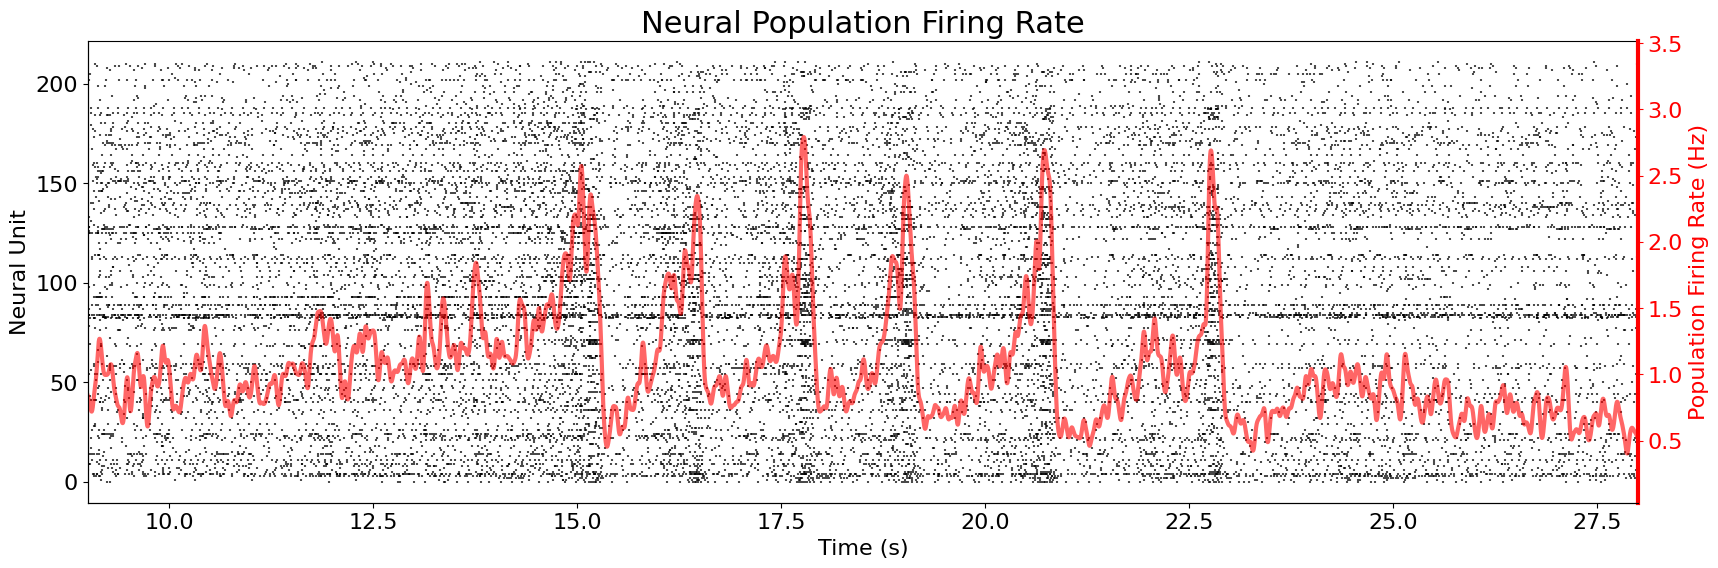

In [5]:
plot_raster(sd, xlim=(9,28), title="Neural Population Firing Rate",size=(20,6))

In [6]:
data = get_brain_waves( data_raw["data"], data_raw["frame_rate"] )#[wave_type]  # get common brain waves


# Functions

In [32]:
def plot_histology_electrode_helper(sd, electrode_mapping, image_path, red_electrodes=[], electrode_color="darkorange", electrodes=True, xlim=(0, 3850), ylim=(0, 2100) ):
    """
    Function: Plots histology image with electrodes and neurons overlaid.
    Inputs: 
        sd (SpikeData object): contains the metadata necessary to plot the neurons and electrodes
        image_path (string): path to histology image
        electrodes (True/False): Whether or not to plot electrodes
        neurons (True/Fasle): Whether or not to plot neurons
        neurons (True/Fasle): Whether or not to plot neurons
        xlim, ylim (tuple): x and y limits of the plot. Defaults to the dimensions of the MEA
    Outputs:
        Displays a plot of the histology image with electrodes and neurons overlaid
    """
                                                
    # Add background image
    plt.figure(figsize=(15,10))       # Set image size to roughly the shape of the MEA
    img = plt.imread(image_path)      # Load in image
    plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions

    # Plot electrodes
    if electrodes:        # Get electrode positions from metadata, the plot them
        plt.scatter( electrode_mapping[:,0], electrode_mapping[:,1], s=4, c=electrode_color)

    for electrode_num in red_electrodes:
        plt.scatter( electrode_mapping[electrode_num,0], electrode_mapping[electrode_num,1], s=350, c="red")

    #add legend, axises limits, labels,  and title
    legend_elements = [Patch(facecolor=electrode_color) ]   # Create colors in legend
    plt.legend(legend_elements, ["Electrode"])       # Add legend       
    plt.xlim( xlim[0], xlim[1] )                                       # Set axis limits to that of the MEA
    plt.ylim( ylim[0], ylim[1])
    plt.xlabel('um')                                         # add axises and title
    plt.ylabel('um')
    plt.title(f"Electrode Layout")
    plt.show()  

# electrode 0

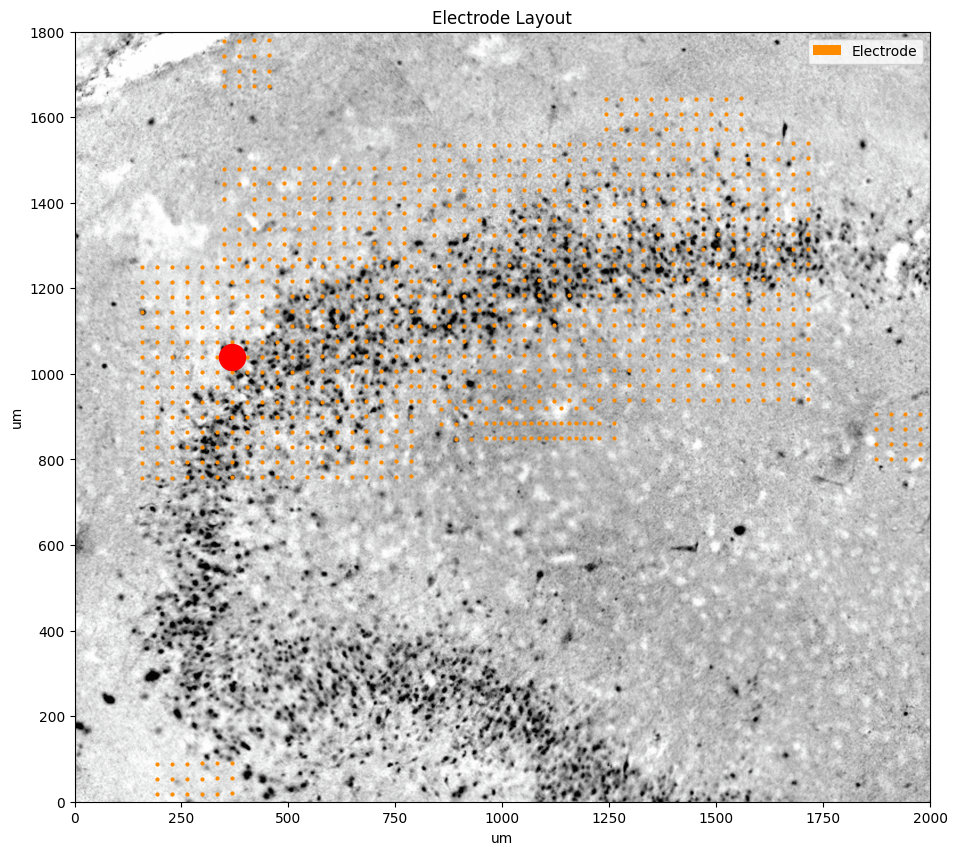

In [36]:
plot_histology_electrode_helper( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
                              red_electrodes=  [0],
                              electrode_color="darkorange", xlim=(0,2000),ylim=(0, 1800)  )

In [38]:
power, times, frequencies, coif = cwt_spectrogram( data["basic"][0,:],  data_raw["frame_rate"], nNotes=12)

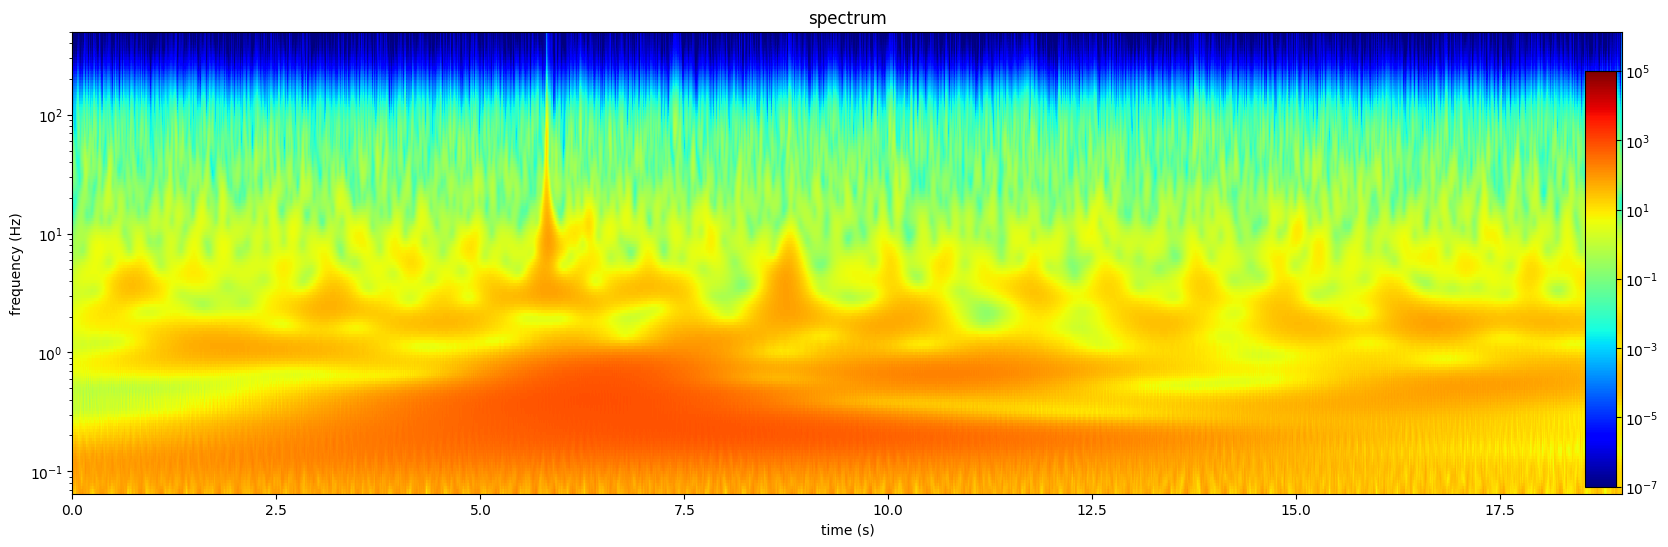

In [53]:
#print(i, channel,raw_trace.shape)
fig, axs = plt.subplots(1, 1, figsize=(20, 6))
spectrogram_plot(power, times, frequencies, coif, ax=axs)

axs.set_title(f"spectrum", fontsize=12)
#axs.set_xlim(0, len(data1_lfp)/fs ) # code causes errors
#axs.set_ylim(0, 100)
axs.set_xlabel('time (s)')
axs.set_ylabel('frequency (Hz)')
axs.set_yscale('log')
#axs.set_ylim(1,120)
plt.show(block=False)

# electrode 19

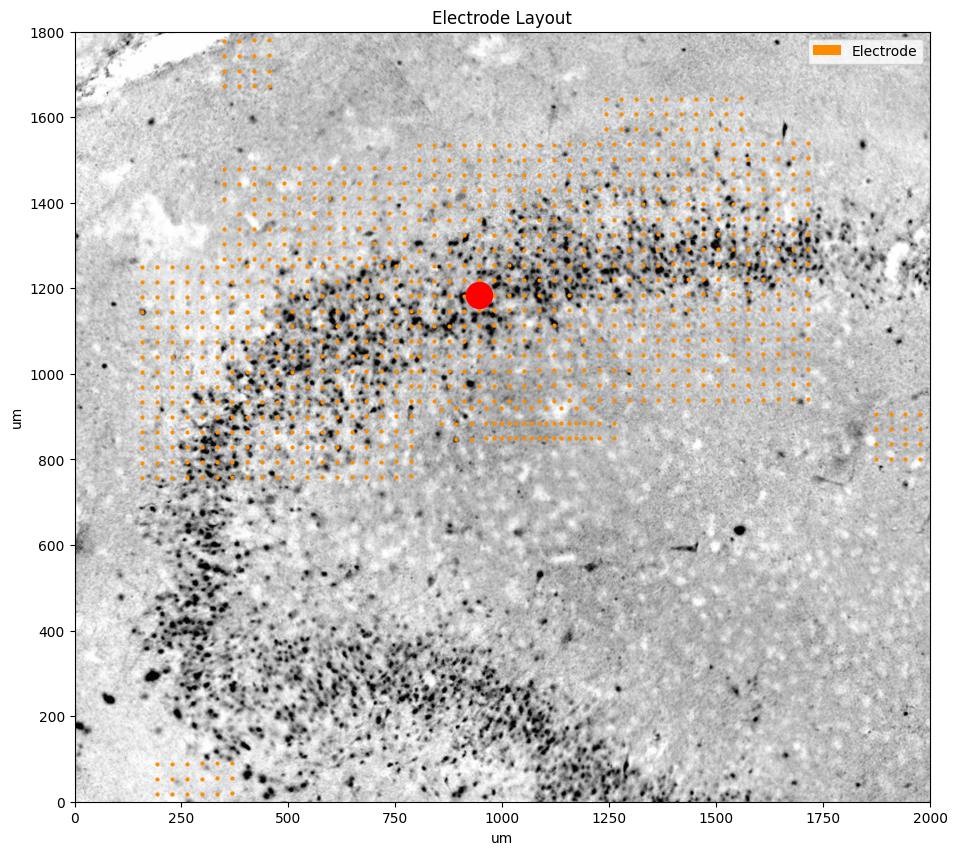

In [33]:
plot_histology_electrode_helper( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
                              red_electrodes=  [19],
                              electrode_color="darkorange", xlim=(0,2000),ylim=(0, 1800)  )

In [34]:
data = get_brain_waves( data_raw["data"], data_raw["frame_rate"] )#[wave_type]  # get common brain waves

In [35]:
power, times, frequencies, coif = cwt_spectrogram( data["basic"][19,:],  data_raw["frame_rate"], nNotes=12)



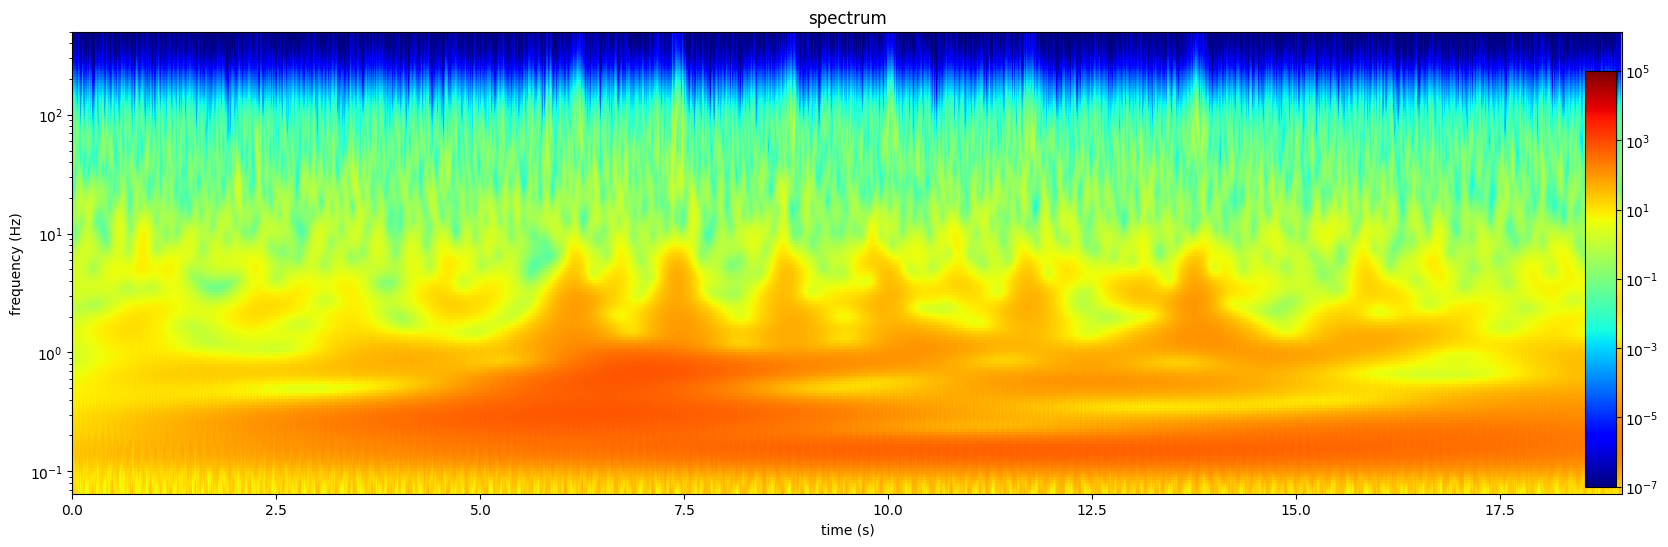

In [20]:
#print(i, channel,raw_trace.shape)
fig, axs = plt.subplots(1, 1, figsize=(20, 6))
spectrogram_plot(power, times, frequencies, coif, ax=axs)

axs.set_title(f"spectrum", fontsize=12)
#axs.set_xlim(0, len(data1_lfp)/fs ) # code causes errors
#axs.set_ylim(0, 100)
axs.set_xlabel('time (s)')
axs.set_ylabel('frequency (Hz)')
axs.set_yscale('log')
#axs.set_ylim(1,120)
plt.show(block=False)

# electrode 1

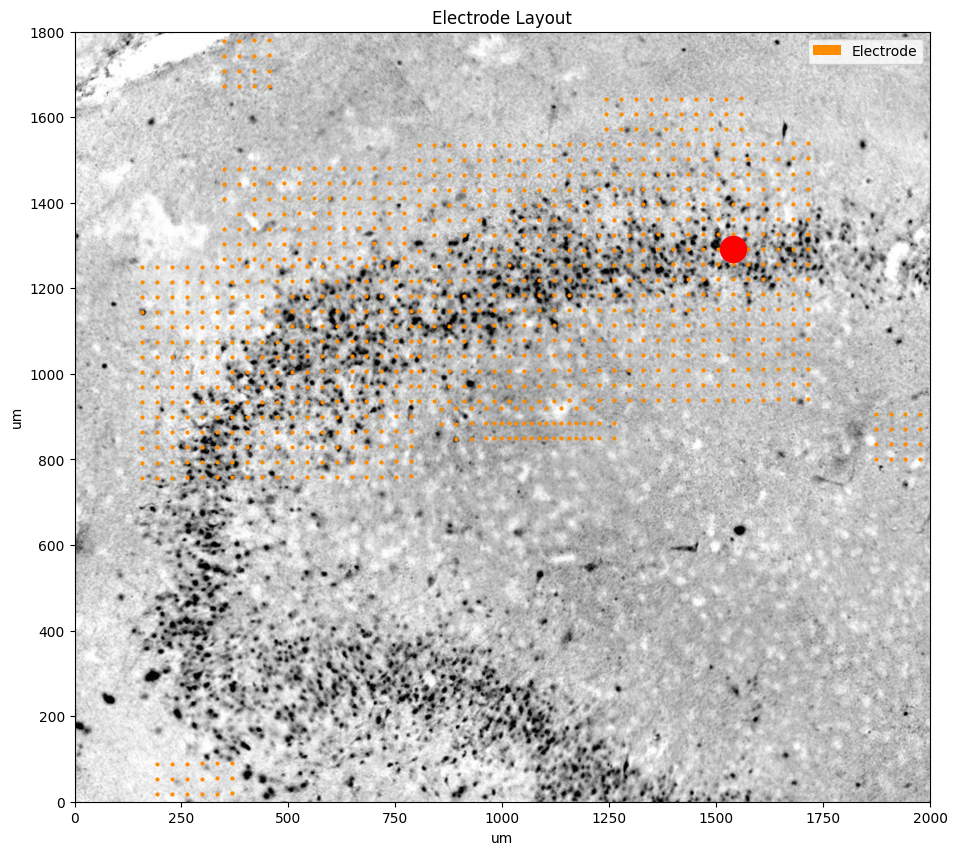

In [46]:
plot_histology_electrode_helper( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
                              red_electrodes=  [1],
                              electrode_color="darkorange", xlim=(0,2000),ylim=(0, 1800)  )

In [47]:
power, times, frequencies, coif = cwt_spectrogram( data["basic"][1,:],  data_raw["frame_rate"], nNotes=12)

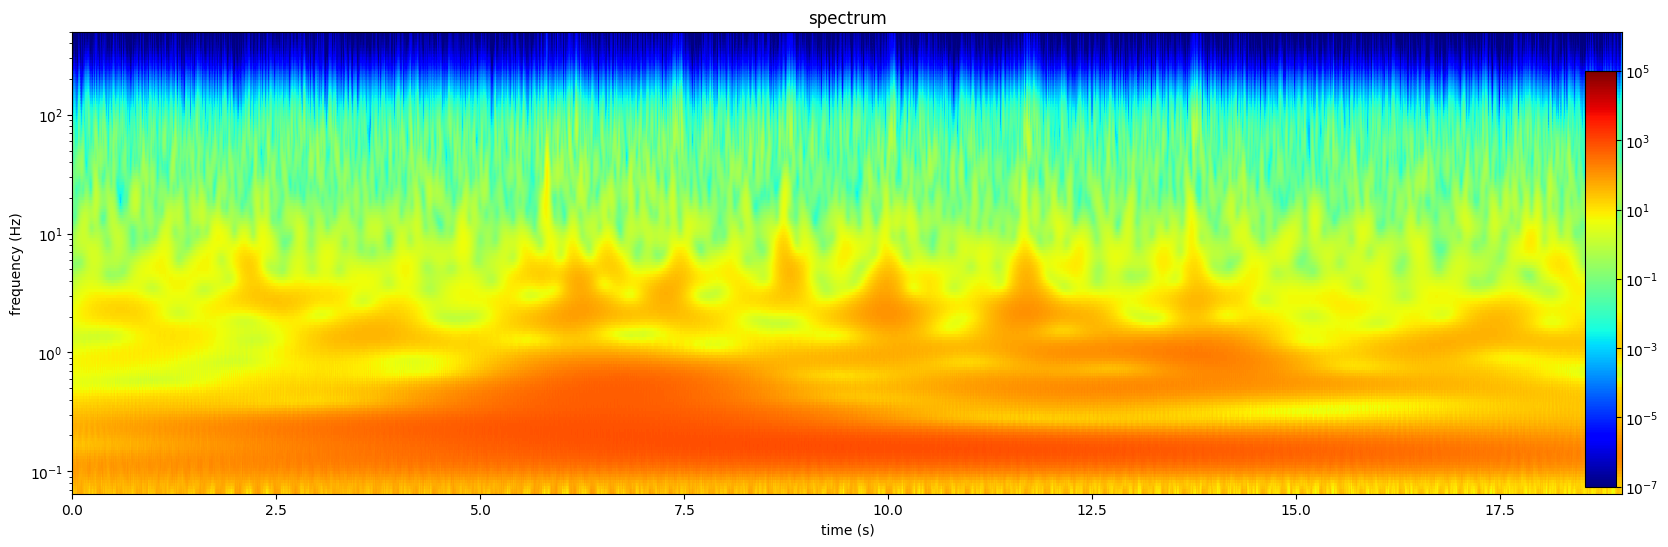

In [48]:
#print(i, channel,raw_trace.shape)
fig, axs = plt.subplots(1, 1, figsize=(20, 6))
spectrogram_plot(power, times, frequencies, coif, ax=axs)

axs.set_title(f"spectrum", fontsize=12)
#axs.set_xlim(0, len(data1_lfp)/fs ) # code causes errors
#axs.set_ylim(0, 100)
axs.set_xlabel('time (s)')
axs.set_ylabel('frequency (Hz)')
axs.set_yscale('log')
#axs.set_ylim(1,120)
plt.show(block=False)

# Plot Firing Rate Spectrogram

Text(0.5, 0, 'Time (s)')

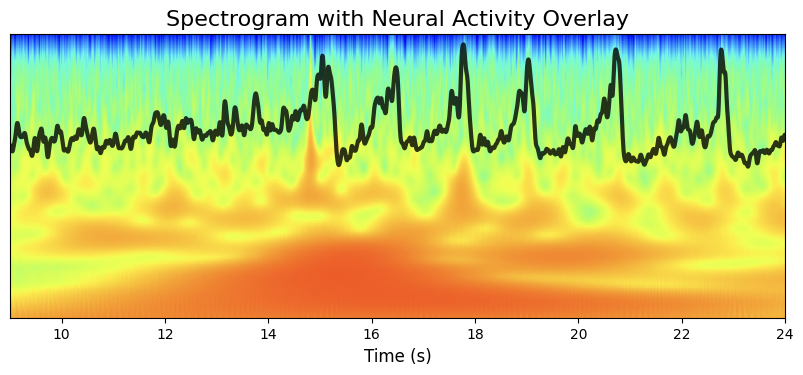

In [8]:
fig, axs =  plt.subplots(1, 1, figsize=(10, 6) )

pop_rate = sd.binned(bin_size=1)
pop_fr = gaussian_filter1d(pop_rate.astype(float), sigma=20)
bins = np.linspace(0, sd.length, pop_rate.shape[0] ) #/1000
plt.plot(bins/1000, pop_fr, color="black", linewidth=3, alpha=0.8)

# add title
plt.title("Spectrogram with Neural Activity Overlay", fontsize=16)
img = plt.imread("spectrogram.png")      # Load in image
plt.imshow(img,  extent=[9, 28, -3, 3.5]) # Plot image, have it correspond to electrode dimensions

#plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions

plt.xlim(9,24)
plt.ylim(-2.5,3)
#axs.set_xticks([])
axs.set_yticks([])
axs.set_xlabel("Time (s)", fontsize=12)
